In [17]:
from IPython import display
from matplotlib import pyplot as plt
from mxnet import nd

import numpy as np
import random
import math


In [11]:
def use_svg_display():
    # Use the svg format to display plot in jupyter
    display.set_matplotlib_formats('svg')


def set_figsize(figsize=(3.5, 2.5)):
    # Change the default figure size
    use_svg_display()
    plt.rcParams['figure.figsize'] = figsize



[3]
<NDArray 1 @cpu(0)>

[3 4 5 3 5 3 5 2 3 3]
<NDArray 10 @cpu(0)>

[0. 0. 1. 0. 0. 0.]
<NDArray 6 @cpu(0)>

[0.16831683 0.11881188 0.1980198  0.18811882 0.16831683 0.15841584]
<NDArray 6 @cpu(0)>


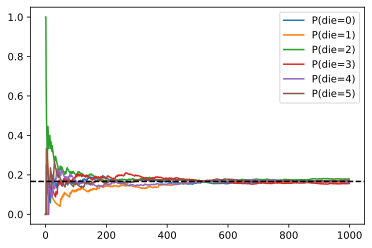

In [12]:
'''
    1. Basic Probability Theory
'''
# In MxNet, we can call sample from the multinomial distribution via the aptly named function
probabilities = nd.ones(6)/6
print(nd.random.multinomial(probabilities))
print(nd.random.multinomial(probabilities, shape=10))

# Now we can simulate 1000 rolls
rolls = nd.random.multinomial(probabilities, shape=1000)
# We can also visualize how these probabilities converge over time towards reasonable estimates in count array
counts = nd.zeros((6, 1000))
total = nd.zeros(6)

for i, roll in enumerate(rolls):
    total[int(roll.asscalar())] += 1
    counts[:,i]=  total
    
# In count array, normalizing by the number of tosses, we get:
x = nd.arange(1000).reshape((1, 1000)) + 1
estimates = counts / x
print(estimates[:, 0])
print(estimates[:, 100])

set_figsize((6, 4))
for i in range(6):
    plt.plot(estimates[i, :].asnumpy(), label = ("P(die=" + str(i) + ")"))
plt.axhline(y = 0.16666, color = 'black', linestyle = "dashed")
plt.legend()

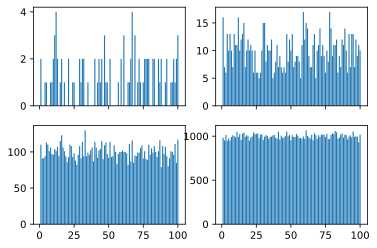

In [19]:
'''
    4. Sampling
'''
# Sampling from uniform distribution
counts = np.zeros(100)
fig, axes = plt.subplots(2, 2, sharex = True)
axes = axes.flatten()

for i in range(1, 100001):
    counts[random.randint(0, 99)] += 1
    if i in [100, 1000, 10000, 100000]:
        axes[int(math.log10(i))-2].bar(np.arange(1, 101), counts)

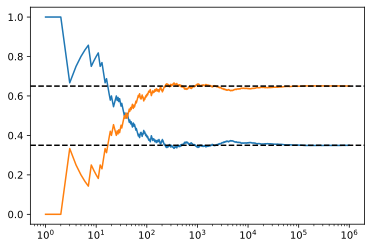

In [20]:

# Number of samples
n = 1000000
y = np.random.uniform(0, 1, n)
x = np.arange(1, n+1)
# Count number of occurrences and divide by the number of total draws
p0 = np.cumsum(y < 0.35) / x
p1 = np.cumsum(y >= 0.35) / x

plt.semilogx(x, p0)
plt.semilogx(x, p1)
plt.axhline(y=0.35, color='black', linestyle='dashed')
plt.axhline(y=0.65, color='black', linestyle='dashed');